# Lab 1: Fair and Biased Coin Flip Solution

One of the powers of quantum is that we can easily generate coin flips by coding a simple circuit and measuring the probabilities of our qubit states. Let's assign a 'Heads' coin flip to our qubit outcome '0' and assign a 'Tails' flip to our qubit outcome '1'. In this lab, we will construct quantum circuit that create a fair 50-50 distribution, a 70-30 biased distrubtion, and a 0-100 completely biased distribution. Before trying the labs yourself, please make use of the Pyquil helper notation below! 

## Necessary Imports

In [6]:
#load the necessary packages and libraries
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
import matplotlib.pyplot as plt
from random import *
import numpy as np
import math

qvm = api.QVMConnection()  

## Pyquil Notation Tricks 

In [7]:
n_qubits = 1 #Sets the number of qubits or coin flips 

theta = math.pi #Sets the 1-qubit gate rotation angle thetea to pi

main_program = Program() #Creates a quantum circuit program 

main_program += H(0) #Performs a Hadamard Gate on the 0th qubit 

main_program += X(0) #Performs a Not Gate on the 0th qubit 

main_program += CNOT(0,1) #Performs a Controlled-Not Gate with 0th qubit as the control and the 1st qubit as the target

main_program += RZ(theta, 0) #Performs a Pauli Z Rotation by angle theta on the 0th qubit 

main_program += RX(theta, 0) #Performs a Pauli X Rotation by angle theta on the 0th qubit 

main_program += RY(theta, 0) #Performs a Pauli Y Rotation by angle theta on the 0th qubit 

wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction

probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution

## Circuit 1: Fair Coin

In order to generate a fair coin distribution, we want the probability of getting a 'Heads' to be the same as the probability of getting a 'Tails'. 

In [8]:
n_qubits = 1 #Sets the number of qubits or coin flips 
main_program = Program() #Creates a quantum circuit program 
for i in range(n_qubits): 
    main_program += H(i) #Performs a Hadamard Gate on the ith qubit 
wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction
probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution
print(probs_dist)

{'0': 0.4999999999999999, '1': 0.4999999999999999}


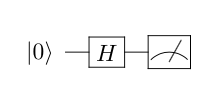

## Exercise: Circuit 2: 70-30 Biased Coin

In order to generate a 70-30 biased coin distribution, we want the probability of getting a 'Heads' to be 0.7 and the probability of getting a 'Tails' to be 0.3. In order to find the apropriate angle for our rotation, we need to do a bit of a guess and check. Have a try!  

In [9]:
main_program = Program() #Creates a quantum circuit program 
for i in range(n_qubits): 
    main_program += RY(theta/2.71,i) #Performs a Y-Rotation with the angle theta/2.71 on the ith qubit
wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction
print(wave_function)
probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution
print(probs_dist)


(0.8366655582+0j)|0> + (0.5477141076+0j)|1>
{'0': 0.7000092562854959, '1': 0.2999907437145041}


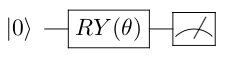

## Exercise: Circuit 3: 0-100 Biased Coin

In order to generate a 0-100 biased coin distribution, we want the probability of getting a 'Heads' to be 0 and the probability of getting a 'Tails' to be 1.

In [11]:
main_program = Program() #Creates a quantum circuit program 
for i in range(n_qubits): 
    main_program += X(i) #Performs a Not Gate on the ith qubit 
wave_function =  qvm.wavefunction(main_program) #Get the output quantum circuit wavefunction
probs_dist    =  wave_function.get_outcome_probs()  #Get the probability distribution
print(probs_dist)

{'0': 0.0, '1': 1.0}


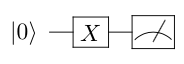